In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_yield = pd.read_csv("../data/yield.csv")
df_temp= pd.read_csv("../data/temp.csv")
df_rainfall = pd.read_csv("../data/rainfall.csv")
df_pesticides = pd.read_csv("../data/pesticides.csv")
df_yield_df = pd.read_csv("../data/yield_df.csv")

In [4]:
#### Checking for a column to implement the join 

print(df_yield.columns)
print(df_yield['Area'].nunique())
print(df_yield['Year'].nunique())

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')
212
56


In [5]:
print(df_yield_df.columns)
print(df_yield_df['Area'].nunique())
print(df_yield_df['Year'].nunique())
df_yield_df.drop(['Unnamed: 0'], axis = 1 ,inplace = True)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')
101
23


In [6]:
print(df_pesticides.columns)
print(df_pesticides['Area'].nunique())
print(df_pesticides['Year'].nunique())

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
168
27


In [7]:
print(df_rainfall.columns)
## Renaming the ' Area' column
df_rainfall.rename(columns = {' Area':'Area'},inplace = True)
print(df_rainfall['Area'].nunique())
print(df_rainfall['Year'].nunique())

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')
217
31


In [8]:
print(df_temp.columns)
df_temp.rename(columns = {'year':'Year','country':'Area'},inplace = True)
print(df_temp['Area'].nunique())
print(df_temp['Year'].nunique())
print(df_temp.columns)

Index(['year', 'country', 'avg_temp'], dtype='object')
137
271
Index(['Year', 'Area', 'avg_temp'], dtype='object')


## The common columns in the above are the Year and and Country(Area) column , we will merge our datasets on these columns

In [9]:
df_temprain = pd.merge(df_rainfall,df_temp,on = ['Year','Area'])
df_trp = pd.merge(df_temprain,df_pesticides , on = ['Year','Area'])

In [10]:
trpl =list(df_trp.columns)
dfy = list(df_yield.columns)
com1 = [i for i in trpl if i in dfy]

In [11]:
print(df_yield.columns)
print(df_yield_df.columns)



ly = [i for i in list(df_yield.columns) if i in (df_yield_df.columns)]

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [12]:
yield_df = pd.merge(df_yield_df,df_yield, on = ['Year','Area','Item'])

In [13]:
print(yield_df.shape)

print(yield_df.columns)
print(df_trp.columns)

(28242, 16)
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'Domain Code', 'Domain', 'Area Code',
       'Element Code', 'Element', 'Item Code', 'Year Code', 'Unit', 'Value'],
      dtype='object')
Index(['Area', 'Year', 'average_rain_fall_mm_per_year', 'avg_temp', 'Domain',
       'Element', 'Item', 'Unit', 'Value'],
      dtype='object')


In [14]:
# Assuming your first dataframe is df1 and second dataframe is df2
years_df1 = set(yield_df['Year'].unique())
years_df2 = set(df_trp['Year'].unique())

# Find the years in df2 that are not in df1
years_only_in_df2 = years_df2 - years_df1

# Print the result
print("Years present in df1 but not in df2:", years_only_in_df2)

Years present in df1 but not in df2: set()


In [15]:
# Assuming your first dataframe is df1 and second dataframe is df2
area_df1 = set(yield_df['Year'].unique())
area_df2 = set(df_trp['Year'].unique())

# Find the years in df2 that are not in df1
area_only_in_df1 = area_df2 - area_df1

# Print the result
print("Area present in df1 but not in df2:", area_only_in_df1)

Area present in df1 but not in df2: set()


## We see that the columns in the respective datasets are the same and the values of Year and Area overlap. Thus we have repetitive data , and hence ignoring the adf_trp dataset .Proceeding with the yield_df.

# Exploratory data analysis

In [16]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Domain Code,Domain,Area Code,Element Code,Element,Item Code,Year Code,Unit,Value
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,56,1990,hg/ha,36613
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,116,1990,hg/ha,66667
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,27,1990,hg/ha,23333
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,83,1990,hg/ha,12500
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,236,1990,hg/ha,7000


In [17]:
print(yield_df['Item Code'].nunique())
print(yield_df['Item'].nunique())
## It has one unique value for each crop

10
10


In [18]:
print(yield_df['Domain'].nunique())
print(yield_df['Domain Code'].nunique())

1
1


In [19]:
print(yield_df['Area'].nunique())
print(yield_df['Area Code'].nunique())

101
101


In [20]:
print(yield_df['Element Code'].nunique())
print(yield_df['Element'].nunique())
print(yield_df['Unit'].nunique())

1
1
1


## From the above it is evident that the Year Code and the Domain code are duplicate and irrelevent columns respectively. The Area code column is not useful for us for drawing any tangible conclusion. Domain also has only one value and hence dropping it. Dropping the columns. Area code is also representative of the Area code. hg/ha_yield And Value and Unit are all connected and hence dropping the last 2 columns

In [21]:
## Making a copy of the dataset , because it may be required for later use

Yield_final_data = yield_df.copy()

In [22]:
Yield_final_data.drop(['Area Code','Year Code','Domain','Domain Code','Area Code','Item Code','Element','Element Code','Unit','Value'],axis = 1 , inplace = True)

In [23]:
Yield_final_data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [24]:
#### Filtering the dataset based on Area being India

Yield_final_data[Yield_final_data['Area'] == 'India'].head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
10502,India,Cassava,1990,205381,1083.0,75000.0,25.58
10503,India,Cassava,1990,205381,1083.0,75000.0,26.88
10504,India,Cassava,1990,205381,1083.0,75000.0,25.79
10505,India,Cassava,1990,205381,1083.0,75000.0,24.10
10506,India,Cassava,1990,205381,1083.0,75000.0,25.25


### The dataset must have the avg_temp in Celsius based on the temparature¶
There is data in the Item column where there are multiple crops listed by ' ,'.¶

In [25]:
Yield_final_data.shape

(28242, 7)

In [26]:
Yield_final_data.loc[Yield_final_data['Area'].str.len().sort_values().index].head(12)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
18518,Mali,"Rice, paddy",1991,17274,282.0,54.63,27.58
18517,Mali,Potatoes,1991,175000,282.0,54.63,27.58
18516,Mali,Maize,1991,13824,282.0,54.63,27.58
18515,Mali,Cassava,1991,72859,282.0,54.63,27.58
18514,Mali,Yams,1990,45091,282.0,95.70,27.61
18545,Mali,"Rice, paddy",1994,16518,282.0,30.96,27.05
18544,Mali,Potatoes,1994,181975,282.0,30.96,27.05
18543,Mali,Maize,1994,11347,282.0,30.96,27.05
18542,Mali,Cassava,1994,73436,282.0,30.96,27.05
18541,Mali,Yams,1993,43023,282.0,33.19,27.55


In [27]:
Yield_final_data['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [28]:
Yield_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


#### The dataset columns seem to be in their correct type

In [29]:
Yield_final_data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [30]:
Yield_final_data.groupby(['Area'],sort = True)[['hg/ha_yield']].sum().nlargest(10, 'hg/ha_yield')

,hg/ha_yield
Area,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


In [31]:
Yield_final_data.groupby(['Area','Item'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Area            Item          
India           Cassava           142810624
                Potatoes           92122514
Brazil          Potatoes           49602168
United Kingdom  Potatoes           46705145
Australia       Potatoes           45670386
India           Sweet potatoes     44439538
Japan           Potatoes           42918726
Mexico          Potatoes           42053880
                Sweet potatoes     35808592
Australia       Sweet potatoes     35550294
Name: hg/ha_yield, dtype: int64

In [32]:
Yield_final_data.groupby(['Item','Area'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

## The datasets show that India is the highest datapoint in the Area column and 'Potato' is the dominant crop

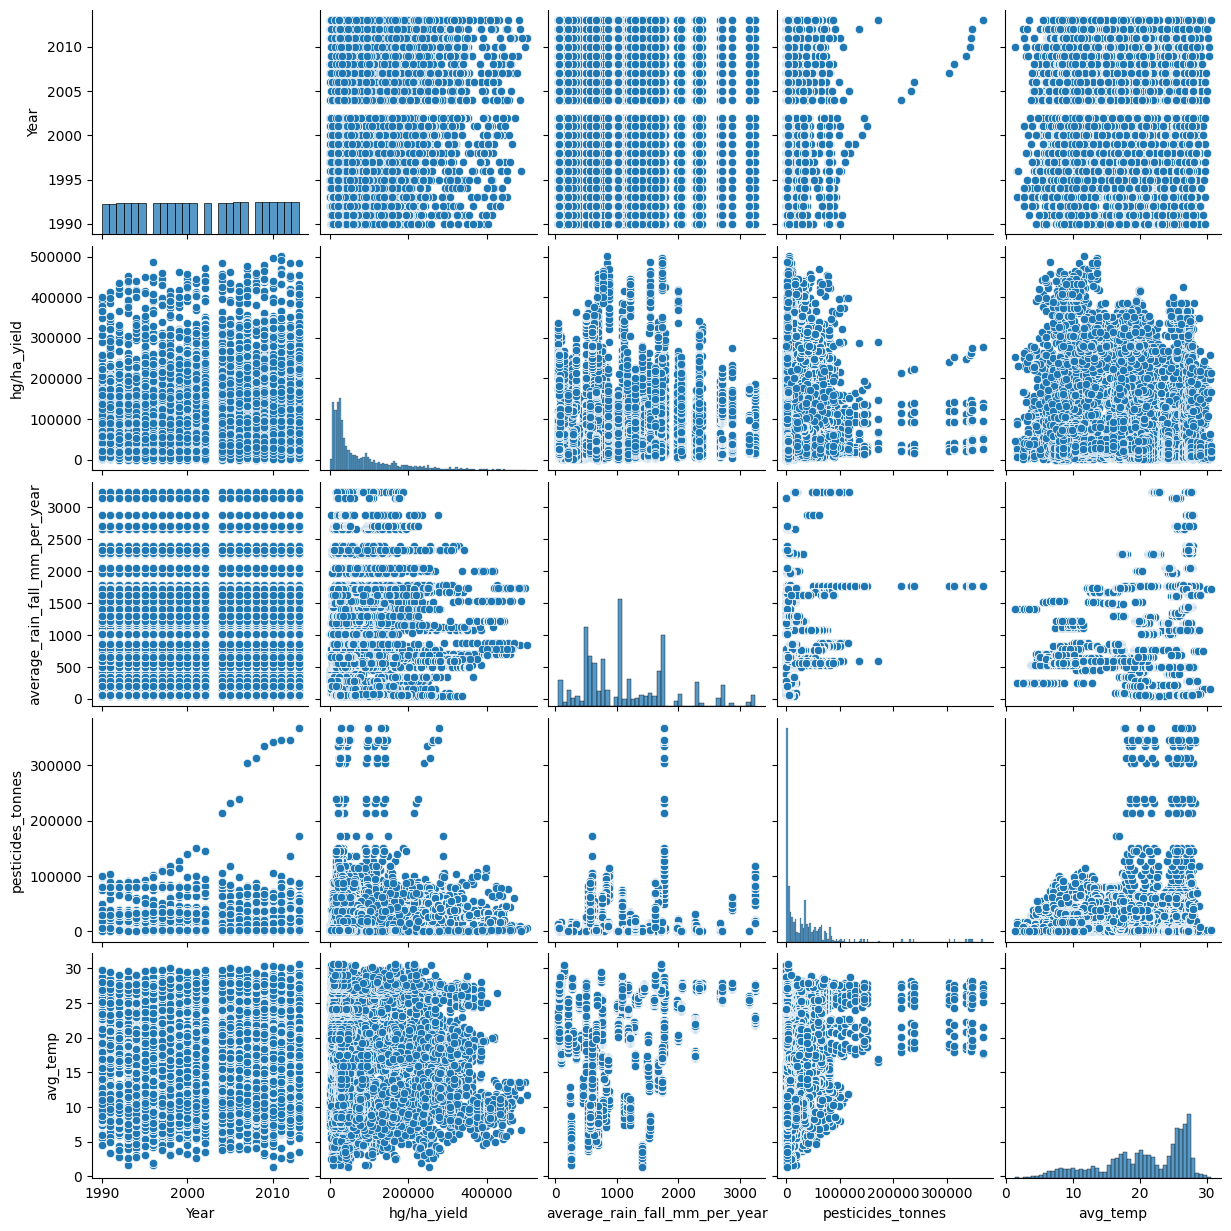

In [33]:
## Checking the pairplot between the columns
import seaborn as sns
sns.pairplot(Yield_final_data)

Text(0.5, 1.0, 'avg_temp')

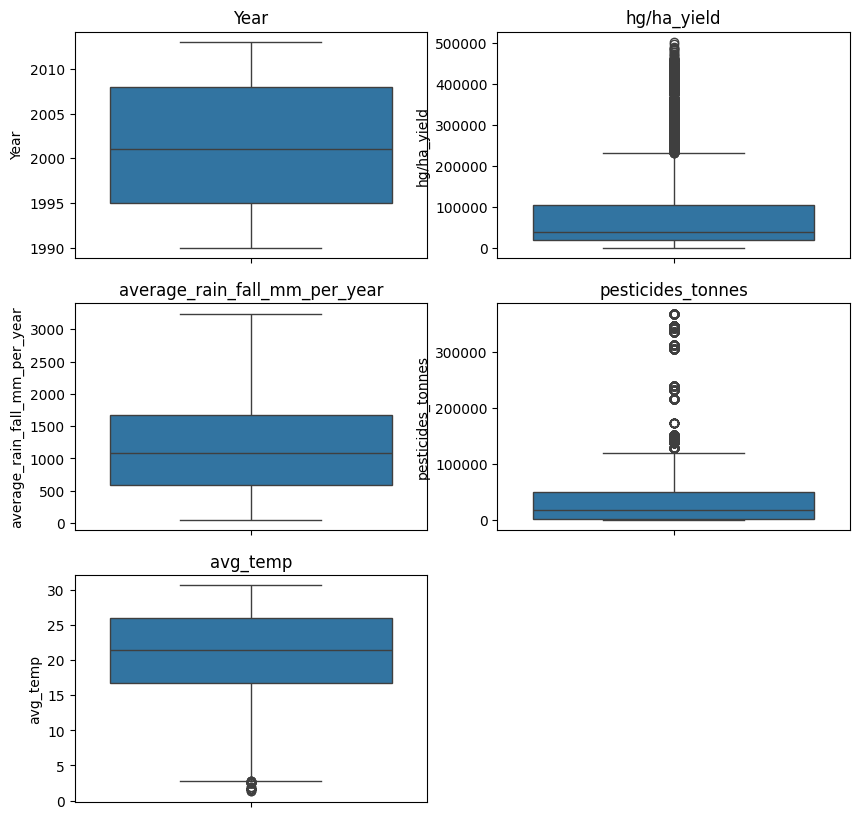

In [34]:
# Checking the data for outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= Yield_final_data['Year'])
plt.title('Year')


plt.subplot(3,2,2)
sns.boxplot(data= Yield_final_data['hg/ha_yield'])
plt.title('hg/ha_yield')

plt.subplot(3,2,3)
sns.boxplot(data= Yield_final_data['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year')

plt.subplot(3,2,4)
sns.boxplot(data= Yield_final_data['pesticides_tonnes'])
plt.title('pesticides_tonnes')

plt.subplot(3,2,5)
sns.boxplot(data= Yield_final_data['avg_temp'])
plt.title('avg_temp')

## We see that there are certain outliers in the avg_temp and pesticides_tonnes columns. But we will not remove anything as of yet.¶

In [35]:
Yield_final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [36]:
Yield_final_data['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [37]:
### Paddy and Rice are the same crop and hence renaming them
##Plantains and others may be any number of distinct crops in over 100 countries so dropping them because they may not anything valuable

Yield_final_data['Item'] = Yield_final_data['Item'].str.replace('paddy','Rice')
Yield_final_data = Yield_final_data[Yield_final_data['Item'] != 'Plantains and others']
Yield_final_data['Item'].value_counts()

Item
Potatoes          4276
Maize             4121
Wheat             3857
Rice, Rice        3388
Soybeans          3223
Sorghum           3039
Sweet potatoes    2890
Cassava           2045
Yams               847
Name: count, dtype: int64

In [38]:
num_cor = Yield_final_data.select_dtypes(['int64','float64']).corr()

Text(0.5, 1.0, 'Heatmap')

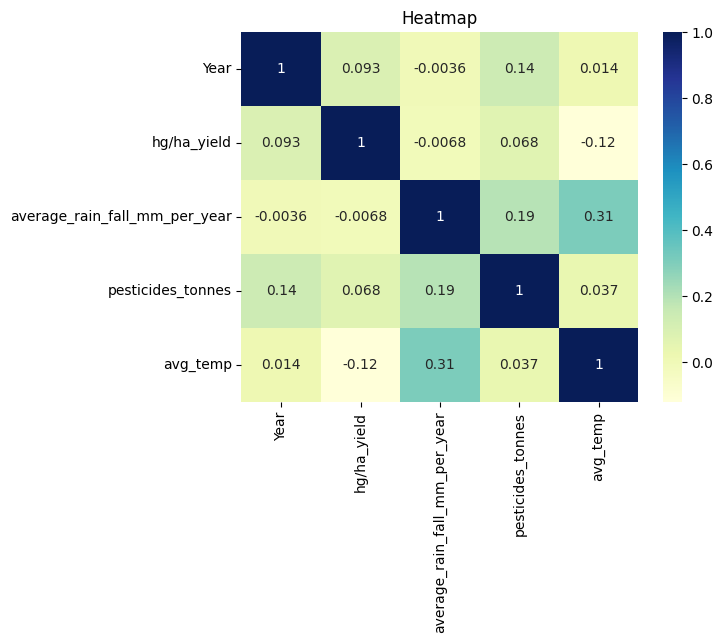

In [39]:
sns.heatmap(num_cor,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

## The plot shows that there is no deep correlation between any columns

<Axes: xlabel='Year', ylabel='Count'>

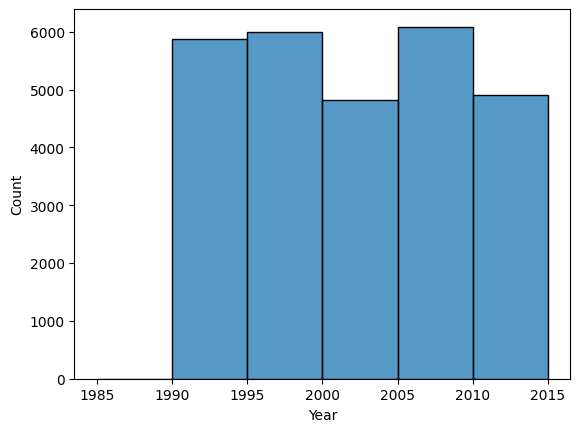

In [40]:
## Checking the data distribution in the 
sns.histplot(Yield_final_data, x = 'Year' , bins = range(1985, 2020, 5))

<Axes: xlabel='hg/ha_yield', ylabel='Count'>

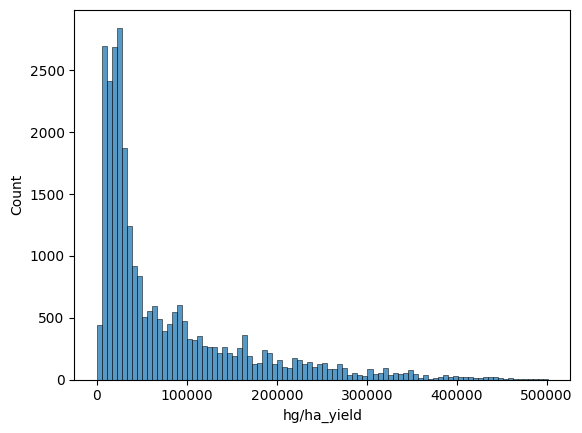

In [41]:
## Checking the data distribution in the yield column
sns.histplot(Yield_final_data, x = 'hg/ha_yield' )

<Axes: xlabel='pesticides_tonnes', ylabel='Count'>

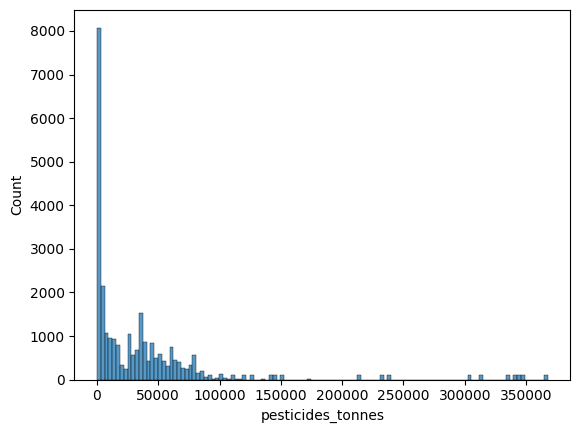

In [42]:
### Checking the pesticide usage data

## Checking the data distribution in the yield column
sns.histplot(Yield_final_data, x = 'pesticides_tonnes' )

## There are outlier points in the datsets and hence dropping only the upper 10% data points to prevent high variance.

In [43]:
Yield_final_data = Yield_final_data[Yield_final_data['pesticides_tonnes'] <= Yield_final_data['pesticides_tonnes'].quantile(0.90)]

<Axes: xlabel='hg/ha_yield', ylabel='Count'>

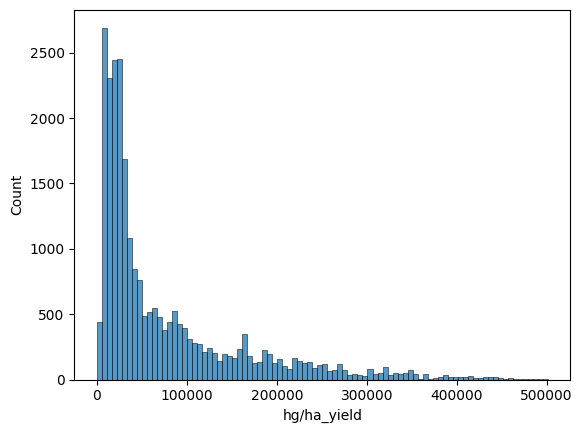

In [44]:
## Checking the data distribution in the yield column(if there have been any changes in the distribution after keeping only 90th quantile of yield)
sns.histplot(Yield_final_data, x = 'hg/ha_yield' )

In [45]:
### There doesnt seem to be much change and hence dropping the upper 5th quantile

Yield_final_data = Yield_final_data[Yield_final_data['hg/ha_yield'] <= Yield_final_data['hg/ha_yield'].quantile(0.95)]

<Axes: xlabel='hg/ha_yield', ylabel='Count'>

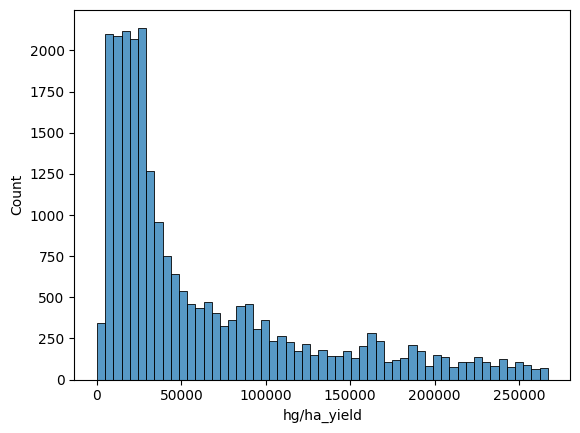

In [46]:
sns.histplot(Yield_final_data, x = 'hg/ha_yield' )

<Axes: xlabel='pesticides_tonnes', ylabel='Count'>

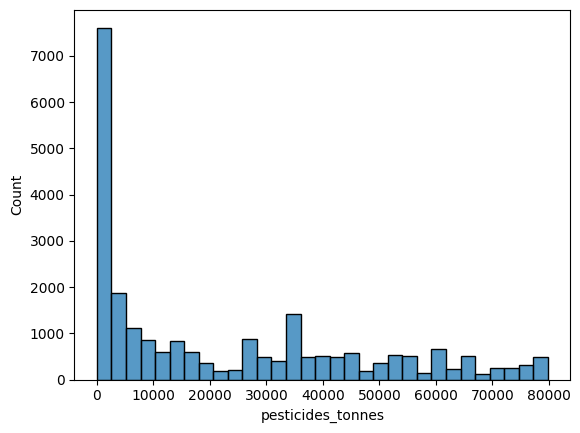

In [47]:
sns.histplot(Yield_final_data, x = 'pesticides_tonnes' )

Text(0.5, 1.0, 'Heatmap')

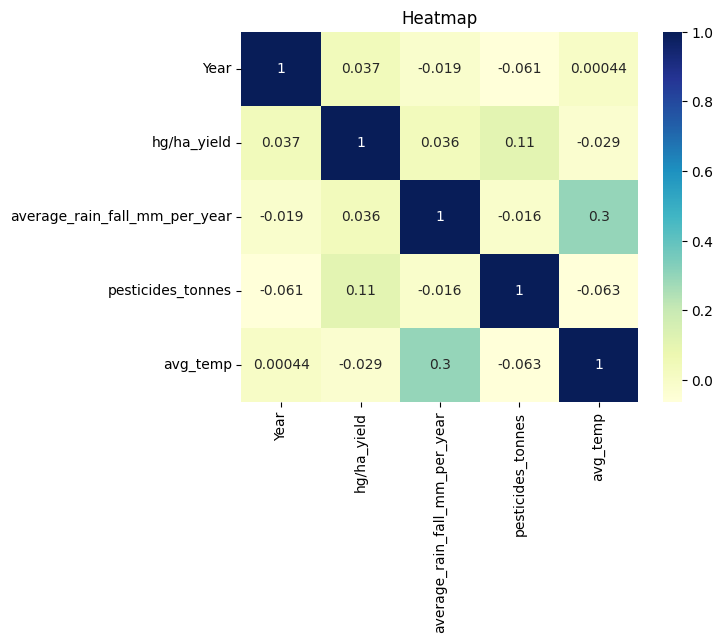

In [48]:
num_cor = Yield_final_data.select_dtypes(['int64','float64']).corr()
sns.heatmap(num_cor,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

## The features still do not bear high correlation and even though the pesticide and yield columns bear left skewness , we will not drop any rows any further fearing loss of information.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [50]:
Yield_final_data = pd.get_dummies(Yield_final_data,columns = ['Item','Area'], drop_first = True)

# Splitting the data in train ,test split

In [51]:
### As of 

split_ratio = 0.25  
split_index = int(len(Yield_final_data) * split_ratio)

# Get the 'Year' value at the split point
split_year = Yield_final_data['Year'].iloc[split_index]

print(f"Split Year: {split_year}")

Split Year: 1992


In [52]:
df_train = Yield_final_data[Yield_final_data['Year'] <= 2009]
df_test  = Yield_final_data[Yield_final_data['Year'] > 2009]

In [53]:
Yield_final_data.shape

(24049, 113)

In [54]:
df_train = df_train.drop('Year',axis = 1)
df_test  = df_test.drop('Year',axis = 1)

X_train = df_train.drop('hg/ha_yield',axis = 1 )
y_train = df_train['hg/ha_yield']
X_test  = df_test.drop('hg/ha_yield', axis = 1)
y_test  = df_test['hg/ha_yield']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19982, 111)
(19982,)
(4067, 111)
(4067,)


In [55]:
y_train.values.reshape(-1,1)
y_test.values.reshape(-1,1)

array([[ 66790],
       [231111],
       [ 16667],
       ...,
       [ 13142],
       [ 22222],
       [ 22888]], shape=(4067, 1))

# Scaling and Model training

In [56]:
X_train
X_train.to_csv('X_train.csv', index=False)

In [57]:
### training the model with LR



from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

Model_perf = pd.DataFrame(columns=['Model_Name','MSE','R2_Score'])

LR_mse = mean_squared_error(y_test,y_pred) 
LR_R2 = r2_score(y_test,y_pred)

new_row = pd.DataFrame([{'Model_Name': 'Linear Regression', 'MSE': LR_mse, 'R2_Score': LR_R2}])
Model_perf = pd.concat([Model_perf, new_row], ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_27076\1543822171.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Model_perf = pd.concat([Model_perf, new_row], ignore_index=True)


# Model_Performance

In [58]:
Model_perf

,Model_Name,MSE,R2_Score
0,Linear Regression,1.107550e+09,0.741884


The accuracy of the Linear Regression Model Train is 76.44
The accuracy of the  Linear Regression Model Test is 74.19


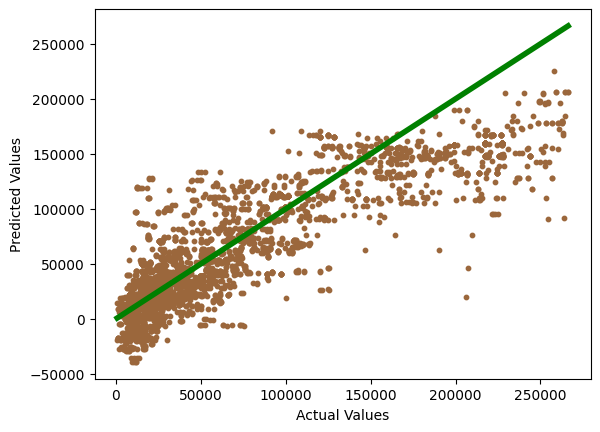

The accuracy of the Random Forest Model Train is 99.57
The accuracy of the  Random Forest Model Test is 90.09


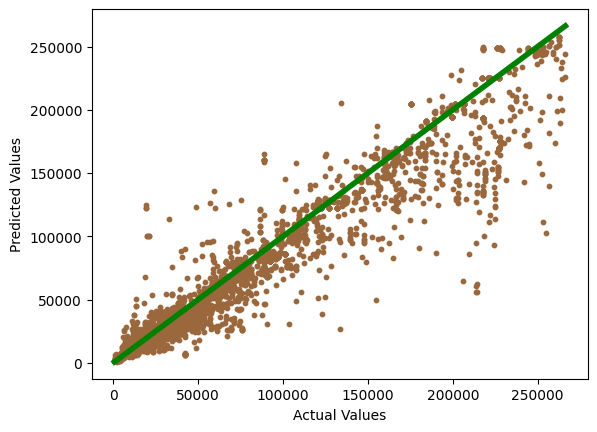

The accuracy of the Gradient Boost Model Train is 77.19
The accuracy of the  Gradient Boost Model Test is 76.52


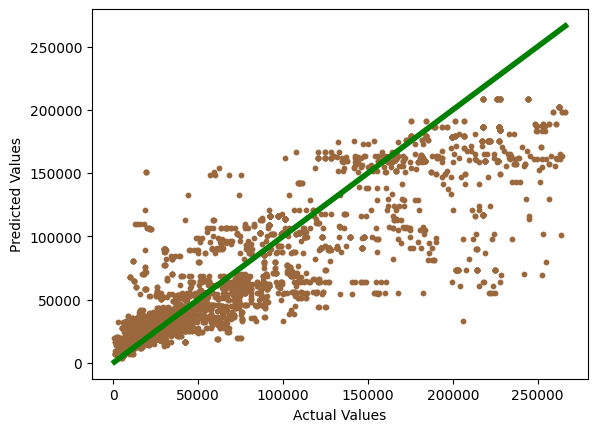

The accuracy of the XGBoost Model Train is 96.79
The accuracy of the  XGBoost Model Test is 88.71


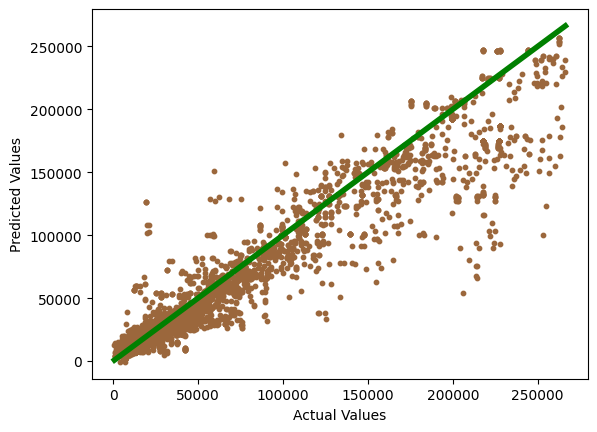

c:\Users\user\Documents\Code\Crop\env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\user\Documents\Code\Crop\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\user\AppData\Local\Pr

The accuracy of the KNN Model Train is 66.21
The accuracy of the  KNN Model Test is 29.95


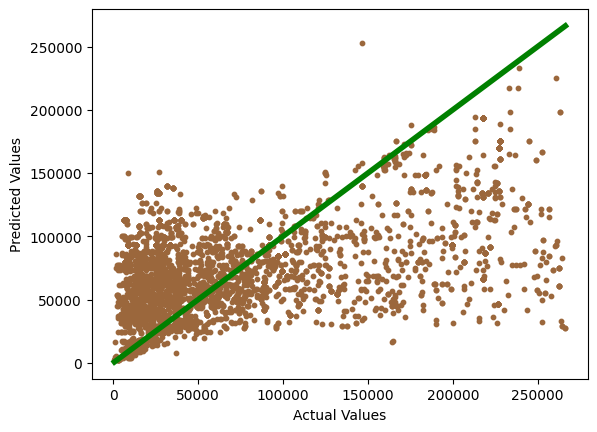

The accuracy of the Decision Tree Model Train is 99.93
The accuracy of the  Decision Tree Model Test is 88.79


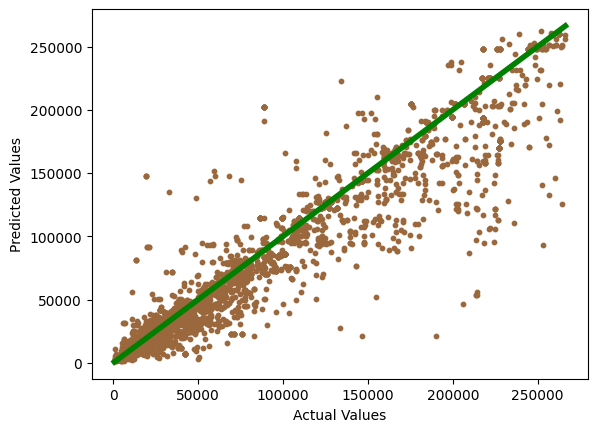

The accuracy of the Bagging Regressor Model Train is 99.57
The accuracy of the  Bagging Regressor Model Test is 90.14


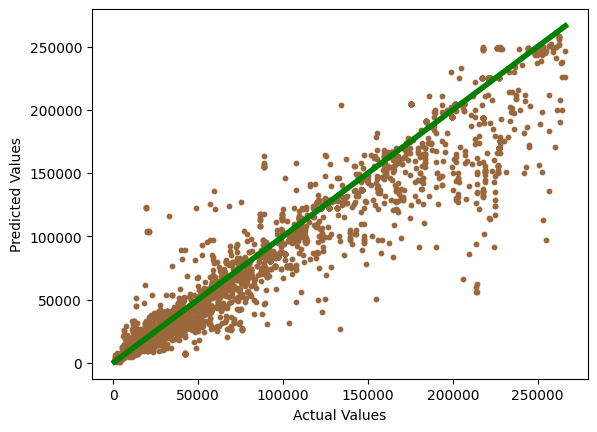

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.741884,1107549957.390911,0.741884
1,Random Forest,0.900887,425285035.601834,0.900887
2,Gradient Boost,0.765178,1007595289.733989,0.765178
3,XGBoost,0.887118,484365824.000000,0.887118
4,KNN,0.299545,3005582245.433735,0.299545
5,Decision Tree,0.887946,480813584.126588,0.887946
6,Bagging Regressor,0.901406,423055771.133488,0.901406


In [59]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)

In [63]:
import joblib

print(f"The best model is: {name}")
model_name = name

# Save the trained model (not predictions)
joblib.dump(model, f'best_model_{model_name}.pkl')

print(f"✅ Best model saved as 'best_model_{model_name}.pkl'")
\
joblib.dump(X_train.columns.tolist(), 'model_features.pkl')


The best model is: Bagging Regressor
✅ Best model saved as 'best_model_Bagging Regressor.pkl'


['model_features.pkl']